In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import pickle

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
with open("shap.pkl", 'rb') as file:
    shaps = pickle.load(file)

In [11]:
features = pd.read_csv("data/pathway_go_bp.csv",index_col=0).columns.tolist()

In [15]:
np.mean(np.abs(shaps[1]), axis=0)[:,32:].shape


(20, 5440)

In [12]:
len(features)

5440

In [4]:
features[0:10]

['GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE',
 'GOBP_REPRODUCTION',
 'GOBP_SINGLE_STRAND_BREAK_REPAIR',
 'GOBP_REGULATION_OF_DNA_RECOMBINATION',
 'GOBP_MITOTIC_SPINDLE_ELONGATION',
 'GOBP_RIBOSOMAL_LARGE_SUBUNIT_ASSEMBLY',
 'GOBP_RIBOSOMAL_SMALL_SUBUNIT_ASSEMBLY',
 'GOBP_VERY_LONG_CHAIN_FATTY_ACID_METABOLIC_PROCESS',
 'GOBP_TRANSITION_METAL_ION_TRANSPORT',
 'GOBP_UREA_CYCLE']

In [5]:
with open("test.pkl", 'rb') as file:
    tests = pickle.load(file)

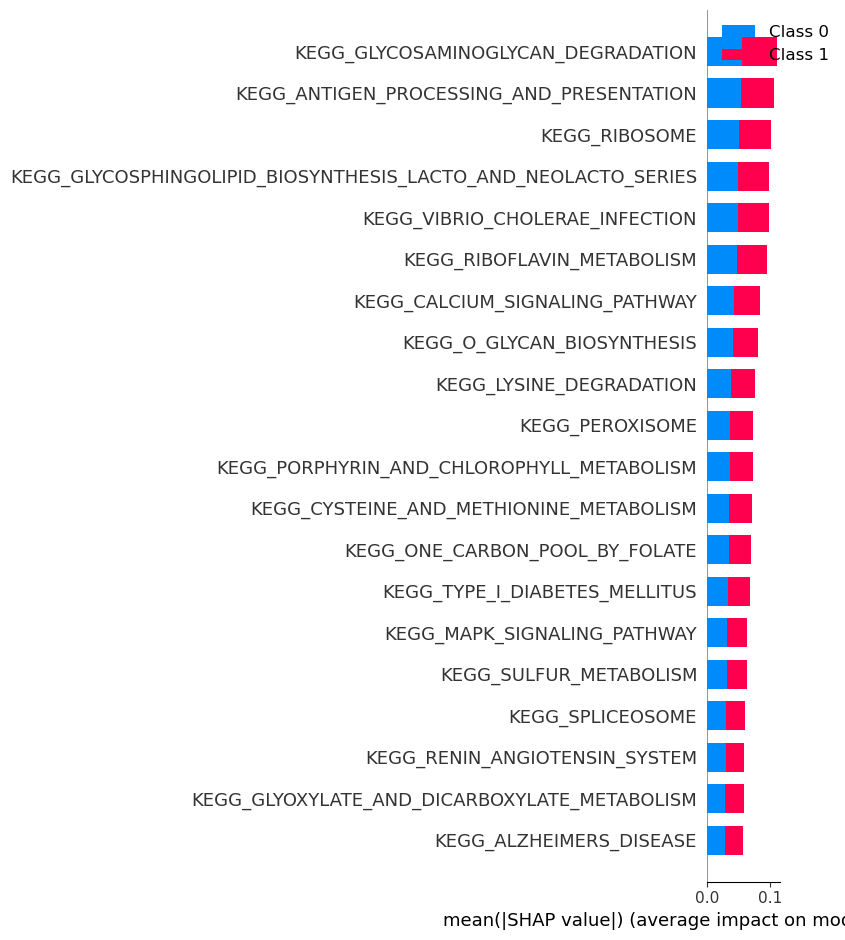

In [6]:
shap.summary_plot(shaps[1],feature_names=features)

In [22]:
result = pd.read_csv("result_mlp.csv", index_col=0)
result['type'] = 'MLP w/o pathway'
result0 = pd.read_csv("result.csv", index_col=0)
result0['type'] = 'Prediction'
result1 = pd.read_csv("result2.csv", index_col=0)
result1['type'] = 'Pathway only'

Text(0, 0.5, '')

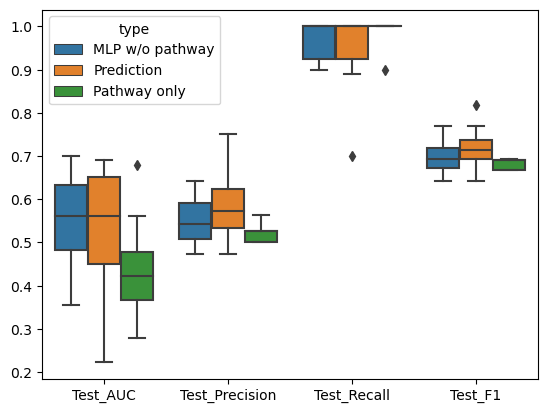

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
perf = pd.concat([result.iloc[:,-5:],result0.iloc[:,-5:],result1.iloc[:,-5:]],axis=0)
df_long = pd.melt(perf, id_vars='type', var_name='Measurement', value_name='Value')
sns.boxplot(x='Measurement', y='Value', hue = 'type', data=df_long)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('Asthma_performance.pdf',format="pdf")

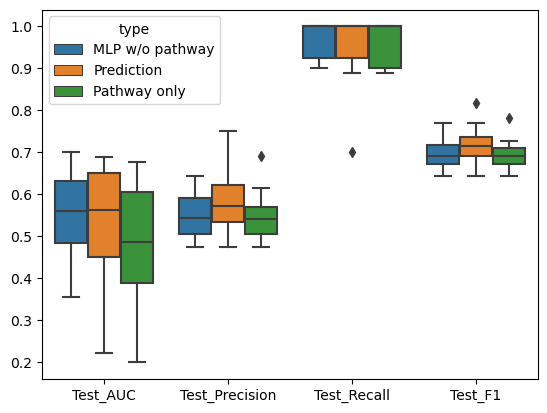

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
perf = pd.concat([result.iloc[:,-5:],result0.iloc[:,-5:],result1.iloc[:,-5:]],axis=0)
df_long = pd.melt(perf, id_vars='type', var_name='Measurement', value_name='Value')
sns.boxplot(x='Measurement', y='Value', hue = 'type', data=df_long)
plt.xlabel('')
plt.ylabel('')
plt.savefig('Asthma_performance.pdf',format="pdf")

In [17]:
for i, shap in enumerate(shaps):
  fi = np.mean(np.abs(shap[1]), axis=0)[32:]
  if i == 0:
    df = pd.DataFrame({"Pathway": features, f'Importance{i+1}': fi})
  else:
    df = pd.concat([df,pd.DataFrame({f'Importance{i+1}': fi})],axis=1)
df

,Pathway,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10
0,GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE,0.001253,0.000839,0.000428,0.000777,0.000020,0.000237,0.002878,0.000647,0.000262,0.001734
1,GOBP_REPRODUCTION,0.000394,0.000328,0.000439,0.001163,0.000022,0.004678,0.000618,0.000771,0.000597,0.000436
2,GOBP_SINGLE_STRAND_BREAK_REPAIR,0.001406,0.001582,0.000634,0.001308,0.000014,0.000332,0.001292,0.000121,0.001789,0.000413
3,GOBP_REGULATION_OF_DNA_RECOMBINATION,0.000892,0.002517,0.002238,0.001404,0.000021,0.000962,0.003659,0.000425,0.002244,0.000297
4,GOBP_MITOTIC_SPINDLE_ELONGATION,0.000907,0.000512,0.000715,0.000903,0.000081,0.000424,0.006646,0.000534,0.001361,0.000513
...,...,...,...,...,...,...,...,...,...,...,...
5435,GOBP_NEGATIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.002886,0.000178,0.000583,0.001545,0.000041,0.000956,0.000419,0.000085,0.000316,0.000981
5436,GOBP_POSITIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.001329,0.001383,0.000406,0.000978,0.000030,0.001128,0.001457,0.003406,0.001730,0.000105
5437,GOBP_REGULATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE...,0.000547,0.001982,0.000983,0.001251,0.000014,0.003196,0.002490,0.000079,0.001414,0.000843
5438,GOBP_POSITIVE_REGULATION_OF_CYSTEINE_TYPE_ENDO...,0.002926,0.000606,0.000239,0.002252,0.000055,0.000265,0.001572,0.000189,0.001357,0.000050


In [18]:
df['mean'] = df.iloc[:, 1:10].mean(axis=1)
df = df.sort_values(by="mean", ascending=False)
df

,Pathway,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10,mean
2605,GOBP_MECHANORECEPTOR_DIFFERENTIATION,0.001442,0.001563,0.003922,0.000252,0.000069,0.001525,0.015262,0.001415,0.002431,0.000996,0.003098
2930,GOBP_POSITIVE_REGULATION_OF_CHOLESTEROL_BIOSYN...,0.005019,0.006085,0.004358,0.001907,0.000057,0.000390,0.006240,0.000933,0.001731,0.000243,0.002969
440,GOBP_CARDIAC_RIGHT_VENTRICLE_MORPHOGENESIS,0.004333,0.000280,0.006523,0.003657,0.000007,0.003263,0.006612,0.000834,0.000402,0.001484,0.002879
3556,GOBP_ESTABLISHMENT_OF_RNA_LOCALIZATION,0.000412,0.002669,0.003722,0.000796,0.000149,0.002726,0.013923,0.000511,0.000931,0.000428,0.002871
3602,GOBP_KINETOCHORE_ASSEMBLY,0.000312,0.001473,0.005456,0.002715,0.000013,0.001376,0.012446,0.000289,0.001547,0.002234,0.002847
...,...,...,...,...,...,...,...,...,...,...,...,...
2596,GOBP_PHOTORECEPTOR_CELL_DEVELOPMENT,0.000348,0.000399,0.000429,0.000401,0.000014,0.001039,0.000443,0.000162,0.000639,0.000727,0.000430
4581,GOBP_MAST_CELL_MIGRATION,0.000988,0.000170,0.000796,0.000458,0.000022,0.000143,0.000417,0.000315,0.000554,0.000205,0.000429
1904,GOBP_RESPONSE_TO_MAGNESIUM_ION,0.000268,0.000237,0.000453,0.000470,0.000082,0.000961,0.000621,0.000263,0.000486,0.002180,0.000427
3519,GOBP_REGULATION_OF_HELICASE_ACTIVITY,0.000679,0.000189,0.000325,0.000182,0.000101,0.000583,0.000152,0.000910,0.000707,0.000900,0.000425


Text(0.5, 1.0, 'Top 30 Features')

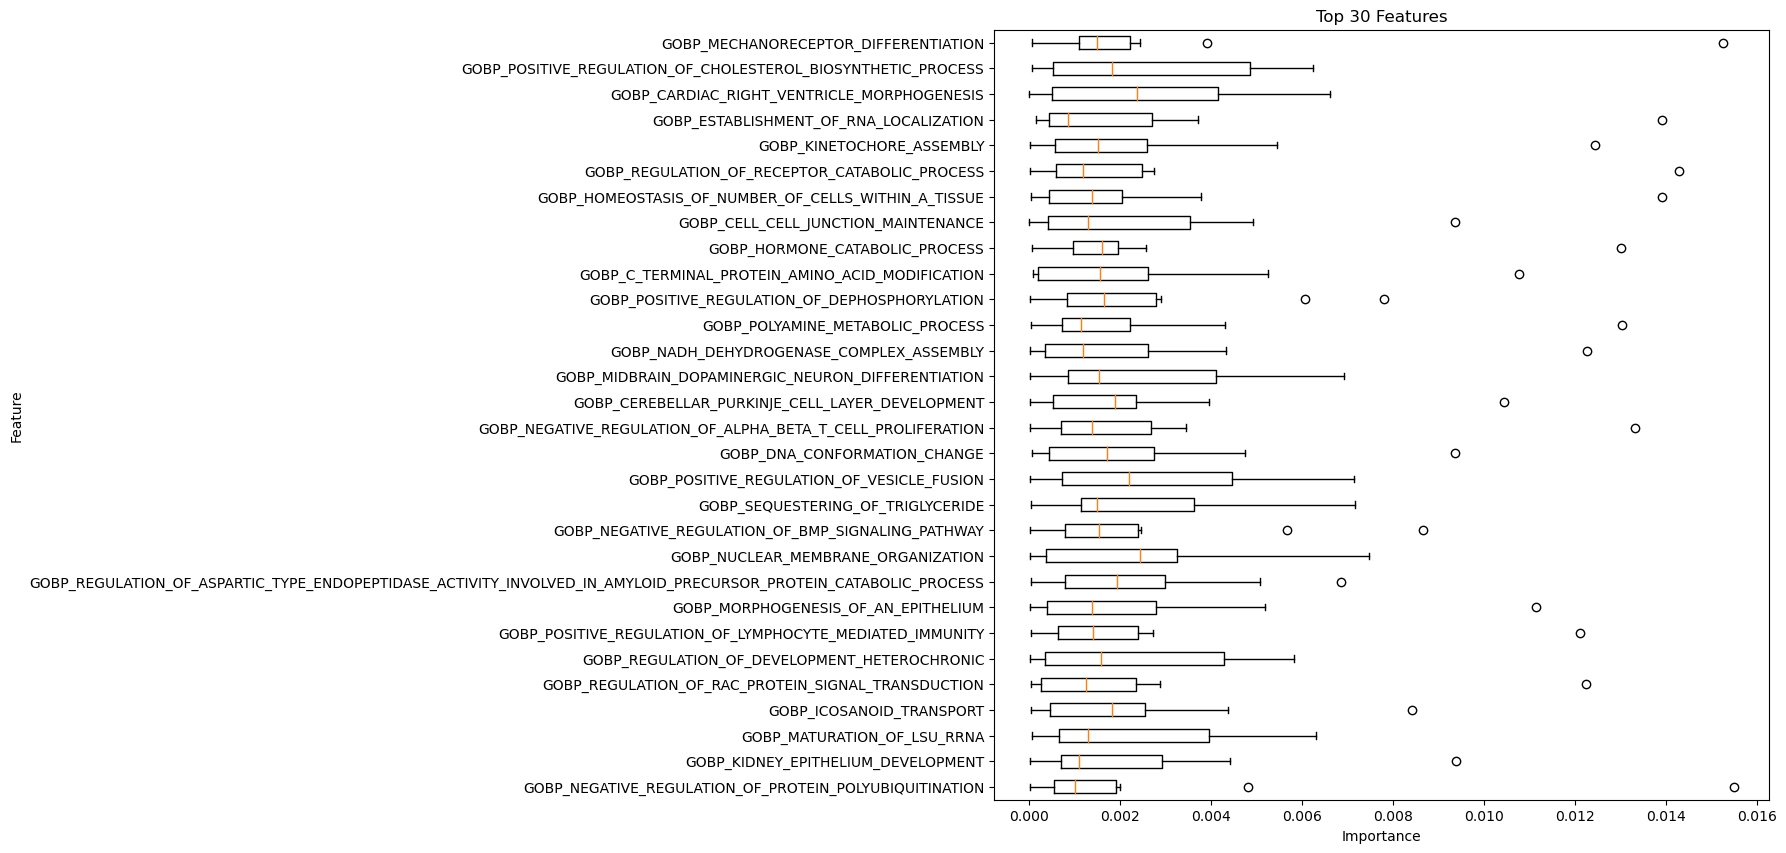

In [20]:
top30 = df.head(30).iloc[::-1]
top30.set_index('Pathway', inplace=True)
plt.figure(figsize=(10, 10))
plt.boxplot(top30.iloc[:,:10].T.values, labels=top30.index,vert=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Features')
#plt.savefig('top_30_path.png',dpi=300)

In [13]:
df

,Feature,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10,mean
150,KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,0.002516,0.019432,0.011287,0.036977,0.038742,0.013286,0.021792,0.044665,0.001282,0.010537,0.021109
129,KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY,0.012549,0.003457,0.040232,0.013471,0.029193,0.010082,0.004275,0.044483,0.024011,0.001786,0.020195
24,KEGG_CARDIAC_MUSCLE_CONTRACTION,0.017278,0.015109,0.014841,0.018533,0.026839,0.004944,0.004711,0.058600,0.013502,0.035221,0.019373
13,KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_...,0.036410,0.049525,0.022124,0.013206,0.011874,0.003552,0.001694,0.031077,0.001284,0.003540,0.018972
15,KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SE...,0.007988,0.023890,0.012233,0.014843,0.020288,0.012339,0.031438,0.010382,0.032616,0.003334,0.018446
...,...,...,...,...,...,...,...,...,...,...,...,...
49,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,0.002907,0.007821,0.003029,0.010122,0.002294,0.001086,0.006335,0.008272,0.002850,0.012346,0.004969
42,KEGG_FATTY_ACID_METABOLISM,0.001487,0.005519,0.005653,0.005636,0.002781,0.002803,0.003260,0.002759,0.009739,0.007592,0.004404
26,KEGG_CIRCADIAN_RHYTHM_MAMMAL,0.004351,0.002789,0.003344,0.018487,0.001448,0.001237,0.004638,0.000430,0.002821,0.027180,0.004394
100,KEGG_CHEMOKINE_SIGNALING_PATHWAY,0.002865,0.001742,0.002290,0.001807,0.005487,0.001774,0.013019,0.000791,0.009762,0.005156,0.004393


In [7]:
df.to_csv("GOBP_Pathway_importance_Asthma.csv",index=None)